In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

# Пути к файлам
flats_file = "/content/flats_expanded.csv"
df_flats = pd.read_csv(flats_file, low_memory=False)


In [5]:
df_flats.head()

,price,discount,preDiscountPrice,preDiscount,priceWoDiscount,prePrice,mortgagePayment,mortgagePaymentSubsidized,mortgagePaymentFamily,mortgageFirstPaymentSubsidized,...,labels_description,labels_accent,traits_title,auction,features_slug,features_title,photo,bookingPair__id,bookingPair_type,bookingPair_mandatory
0,18781963,28,0,0,26086060,False,227863,28911,0,11830849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18781963,28,0,0,26086060,False,227863,28911,0,11830849,...,Итоговая скидка с учетом Акции 1% за подписку ...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18781963,28,0,0,26086060,False,227863,28911,0,11830849,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18781963,28,0,0,26086060,False,227863,28911,0,11830849,...,Студия участвует в акции Купите сейчас - плати...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18781963,28,0,0,26086060,False,227863,28911,0,11830849,...,NaN,NaN,Линейная,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Основной датафрейм, в котором лежат квартры и поля по ним. Есть несколько колонок со значениями null но это не целевые колонки и не признаки влияющие на целевые параметры. Так что это приемлимо.
df_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15786 entries, 0 to 15785
Data columns (total 84 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           15786 non-null  int64  
 1   discount                        15786 non-null  int64  
 2   preDiscountPrice                15786 non-null  int64  
 3   preDiscount                     15786 non-null  int64  
 4   priceWoDiscount                 15786 non-null  int64  
 5   prePrice                        15786 non-null  bool   
 6   mortgagePayment                 15786 non-null  int64  
 7   mortgagePaymentSubsidized       15786 non-null  int64  
 8   mortgagePaymentFamily           15786 non-null  int64  
 9   mortgageFirstPaymentSubsidized  15786 non-null  int64  
 10  investProfit                    15786 non-null  int64  
 11  _id                             15786 non-null  object 
 12  externalId                      

In [7]:
df_flats.sample(20)

,price,discount,preDiscountPrice,preDiscount,priceWoDiscount,prePrice,mortgagePayment,mortgagePaymentSubsidized,mortgagePaymentFamily,mortgageFirstPaymentSubsidized,...,labels_description,labels_accent,traits_title,auction,features_slug,features_title,photo,bookingPair__id,bookingPair_type,bookingPair_mandatory
6721,17261065,22,0,0,22129570,False,209412,28064,0,10343694,...,NaN,NaN,Линейная кухня,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7348,24342285,25,0,0,32456380,False,295322,25683,0,19507569,...,NaN,NaN,NaN,NaN,withview,Видовая квартира,NaN,NaN,NaN,NaN
10467,16228800,25,0,0,21638400,False,196888,101829,0,11826674,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4834,21692642,22,0,0,27811080,False,263176,27221,0,15849406,...,NaN,NaN,Можно оборудовать 2 или более рабочих места,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10759,12324996,25,0,0,16433328,False,149527,86234,0,8171473,...,NaN,NaN,Большая ванная,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7372,35216820,25,0,0,46955760,False,427252,19368,0,34521224,...,NaN,NaN,Угловое остекление,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10186,8224524,25,0,0,10966032,False,99780,57544,0,5452860,...,NaN,NaN,Увеличенное число окон,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3310,31132925,23,0,0,40432370,False,377706,21739,0,28882896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1747,50438245,0,0,0,50438245,False,611919,7245,0,58549710,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
11912,30591858,20,0,0,38239822,False,390817,22054,0,28135886,...,NaN,NaN,Можно оборудовать рабочее место,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Описание датасета

Ниже – обобщённое описание, что можно понять о наборе данных, исходя из структуры (84 столбца, 3321 строка) и примеров значений:

---

### 1. Общий обзор и тематика

- **Всего строк:** 3321.  
- **Всего столбцов:** 84.  
- **Объём памяти:** ~2 МБ.

Судя по названиям столбцов и примерам данных, речь идёт о записях объектов недвижимости (скорее всего, новостройки или объекты в проектах девелопера). В таблице есть:
- Ценовые показатели (price, discount, preDiscountPrice и т.п.),  
- Метаданные о проекте и комплексе (project__id, complex__id, project_title, complex_title и пр.),  
- Параметры ипотеки (mortgagePayment, mortgageRate, mortgagePaymentSubsidized и др.),  
- Характеристики помещений (rooms, areaTotal, areaLiving, areaKitchen, floorNumber и др.),  
- Флаги, описывающие различные акции, промо, наличие мебели и т.д.

Таким образом, это достаточно подробная база для анализа предложения недвижимости и, возможно, для расчёта различных параметров при продаже или сдаче квартир/апартаментов.

---

### 2. Столбцы с числовым типом (int64 / float64)

Ниже перечислены некоторые числовые поля с краткими комментариями:

1. **price, discount, preDiscountPrice, preDiscount, priceWoDiscount**  
   - Связанные с ценой и скидками. Например, если `discount` не равен нулю, значит, есть некоторая скидка (доля или сумма), или же это может быть просто признак.  
   - `priceWoDiscount` часто отражает цену без учёта скидки.  
   - `preDiscountPrice` и `preDiscount` могут отражать цену и величину скидки на какой-то предыдущий момент.  

2. **mortgagePayment, mortgagePaymentSubsidized, mortgagePaymentFamily, mortgageFirstPaymentSubsidized**  
   - Платёж по ипотеке при разных схемах (субсидированная ипотека, семейная ипотека и т.д.).  
   - Поля помогают сравнивать, что будет, если клиент пойдёт по одному ипотечному продукту или по другому.

3. **investProfit**  
   - Возможно, это какая-то оценочная прибыль для инвестора (например, рост стоимости объекта).

4. **externalId, status, rooms, floorNumber, finishing, bookingUser, promoBNPLPercent, promoRoiPercent** и т.д.  
   - Частично – внутренние/внешние идентификаторы и статусы,  
   - Количество комнат (`rooms`),  
   - Этаж квартиры (`floorNumber`),  
   - Тип отделки (`finishing`),  
   - И т.д.

5. **mortgageRate, mortgageRateSubsidized, mortgageExtraSubsidized, investProfitPercent** (float64)  
   - Различные процентные ставки, опять же связанные с ипотекой и доходностью при покупке объекта.

6. **areaTotal, areaLiving, areaKitchen, areaLand**  
   - Площади: общая, жилая, кухня и, возможно, площадь земли (актуально, если это таунхаусы или коттеджи).

7. **floors, bathrooms, crmCategory, crmRoomsQty**  
   - Дополнительные параметры количества этажей (всего в доме), санузлов, категория объекта в CRM, количество комнат для CRM и т.д.

8. **project_city, complex_city, section_number, floor_number и др.**  
   - Часто тип float, значит, возможно, в этих полях бывают и целые значения, но хранятся как float (может быть связано с тем, что где-то встречаются пустые значения или некорректно указан тип).  
   - Почти все имеют пропущенные значения в 1 строке (3320 non-null).

В целом, числовые столбцы могут использоваться для анализа ценообразования, расчёта ипотечных платежей, фильтрации квартир по площади/комнатам и т.п.

---

### 3. Столбцы с логическим типом (bool)

- **prePrice, furniture, finishConf, promoMortgageCashback, promoBNPL, promoLNPL, promoMyPrice**  

Эти поля, судя по названиям, указывают на:
- Есть ли цена «до» (prePrice),  
- Наличие мебели (furniture),  
- Подтверждена ли отделка (finishConf),  
- Участвует ли объект в акции по кешбэку ипотеки (promoMortgageCashback),  
- Участвует ли в BNPL (Buy Now, Pay Later) (promoBNPL),  
- LNPL (аналогично BNPL, но, возможно, другая программа),  
- Признак «Моя цена» (promoMyPrice) – какая-то специальная промо-опция.  

Логические столбцы часто нужны, чтобы отслеживать фильтры/promotions, и можно быстро смотреть долю объектов, участвующих в какой-либо акции.

---

### 4. Текстовые столбцы (object)

Здесь много полей типа `object`, часть из них могут быть действительно строковыми, а часть – вообще любые сложные структуры. Если верить примеру `info()`, то скорее всего это строки. Среди них:

1. **\_id, project__id, complex__id, corpus__id, section__id, floor__id**  
   - Идентификаторы объектов в базе.

2. **kind, plan, planFurniture, group, crmObjectType**  
   - Скорее всего, описывают категории недвижимости, планировки, типы CRM-объектов.  

3. **project_title, project_slug, project_img, project_logo и т.д.**  
   - Метаданные о проекте: название, slug (короткое название/ссылка), лого, изображения.  
   - Аналогичные поля для `complex_...` (комплекс).

4. **corpus_dateDelivery**  
   - Вероятно, дата сдачи корпуса. Хранится как объект (строка). Часто дата может быть строкового типа, особенно если указана квартал/год, но не точный день.  

5. **labels_title, labels_description, labels_accent, traits_title, auction, features_slug, features_title**  
   - Это могут быть различные «маркеры» (лейблы, характеристики, фичи). У некоторых очень много пропусков (например, только 51 значение для `features_slug` и `features_title`).  
   - `auction` может быть признаком того, что объект участвует в аукционе/торгах.  

Часто такие столбцы используют для категорий, описаний, маркетинговых меток (например, «Вид на парк», «Лоджия», «Евроформат»).

---

### 5. Пропуски в данных

- **photo, bookingPair__id, bookingPair_type, bookingPair_mandatory** – 0 ненулевых значений, то есть полностью пустые. Вероятно, технические поля, которые не были заполнены ни для одного объекта (или резерв под будущее).  
- **features_slug, features_title** – всего 51 непустое значение (значит, используется очень редко).  
- **labels_title, labels_description, labels_accent, traits_title, auction** – существенная часть пропущена (см. non-null count).  
- **project_imgDouble, project_city, project_logo, ...** (и ещё около 15–20 таких полей) – 3320 значений из 3321, значит, пропуск всего в 1 записи.  

Важно учесть пропуски в анализе. Например, если вы планируете использовать эти текстовые столбцы или фото для моделей/прогнозов, вам придётся либо исключать эти признаки, либо искать способы их заполнить. А вот пустые целиком поля вроде `photo` – возможно, нужно удалить или игнорировать, если нет планов собирать их в будущем.

---

### 6. Возможное назначение набора данных

Судя по структуре, это классический датасет объектов недвижимости, предназначенный для:
1. **Анализа цен** (проверить распределение price, discount, посмотреть средние цены по районам/проектам).  
2. **Отслеживания динамики по ипотеке** (mortgagePayment, mortgageRate и их субсидированные варианты).  
3. **Маркетинга** и **продаж**:
   - Какие объекты участвуют в промо (promoBNPL, promoMortgageCashback и т.д.),  
   - Какие объекты меблированы, с отделкой, возможно, быстрее продаются.  
4. **CRM-учёт** (crmCategory, crmObjectType и т.д.).  
5. **Отбор объектов** (по площади, этажам, количеству комнат, состоянию).  
6. **Анализа особенностей планировок** (plan, planFurniture, traits_title) – например, лофт, европланировка, отдельная кухня, вид из окна.  

---

### 7. Выводы и что ещё можно сделать

1. **Описательная статистика**:  
   - Посмотреть min/mean/max по цене (`price`) и связанным показателям.  
   - Исследовать распределение комнат, этажей, площадей.  
   - Выявить диапазоны ставок по ипотеке и т.д.

2. **Работа с пропусками**:  
   - Много текстовых столбцов частично пусты; возможно, их нужно аккуратно обработать (заполнить заглушками или удалить при моделировании).  
   - Есть столбцы, полностью пустые. Вероятно, они не несут пользы, их можно исключать или выяснить, почему они не заполнены (возможно, требуется дополнительная интеграция с другими системами).

3. **Категоризация**:  
   - Для колонок вроде `kind, group, crmObjectType, plan, planFurniture` стоит посмотреть, сколько уникальных значений, как часто они встречаются.  
   - Для числовых полей, которые в действительности могут играть роль категорий (например, `rooms`, `propertyType`, `floors`), иногда полезно анализировать их как категориальные признаки.

4. **Возможное применение**:
   - **Прогноз цены** или оценка стоимости (для рекомендательных систем).  
   - **Анализ скидок и промо**: определить, насколько скидка влияет на конечную цену, есть ли корреляция с тем, как быстро продаётся квартира (если есть подобные временные метки).  
   - **Сегментация клиентов** с учётом ипотечных условий.  
   - **Поиск целевых групп**: например, интерес к комнатам, акциям, меблировке и т.д.

В целом, датасет весьма богат на признаки, но многие из них могут оказаться избыточными или редко заполненными, поэтому при дальнейшем использовании нужно внимательно отсеивать редко заполненные колонки или пытаться достать из них максимум информации.

---

#### Итоговое резюме

- **Набор данных**: 3321 объектов недвижимости, 84 параметра.  
- **Основные группы колонок**: цены, ипотека, площади, текстовые описания, идентификаторы проектов/комплексов/корпусов, признаки промо и флаги акций, планировочные и CRM-характеристики.  
- **Пропуски**: несколько столбцов пусты (0 заполнений), некоторые заполнены частично.  
- **Назначение**: анализ и управление недвижимостью (ценообразование, акции, ипотечные программы), маркетинговые задачи, CRM-учёт и т.д.

Это базовое представление о том, что «видно» из структуры. Для дальнейшего анализа стоит провести и статистический, и разведочный анализ (распределения, корреляции, группировки) для каждого интересующего аспекта.

## Визуализация


In [8]:
df = df_flats
df = df[df["rooms"] != 7]
df = df[df["rooms"] != 6]

In [10]:
columns_to_drop = [
    "photo", "preDiscountPrice", "preDiscount", "priceWoDiscount",
    "mortgagePayment", "mortgagePaymentSubsidized", "mortgagePaymentFamily",
    "mortgageFirstPaymentSubsidized", "investProfit", "externalId", "number",
    "status", "numberOnFloor", "finishing", "bookingUser", "promoBNPLPercent",
    "promoRoiPercent", "mortgageRate", "mortgageRateSubsidized",
    "mortgageExtraSubsidized", "investProfitPercent", "areaKitchen", "floors",
    "crmCategory", "crmRoomsQty", "original_flat_id", "complex_city", "floor_number"
]


df.drop(columns=columns_to_drop, inplace=True, errors="ignore")
df.head()


,price,discount,prePrice,_id,areaTotal,kind,propertyType,rooms,floorNumber,furniture,...,labels_title,labels_description,labels_accent,traits_title,auction,features_slug,features_title,bookingPair__id,bookingPair_type,bookingPair_mandatory
0,18781963,28,False,6621257d9e05d3e34ea89f77,28.6,LIVING,7,0,24,False,...,3 кв 2027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18781963,28,False,6621257d9e05d3e34ea89f77,28.6,LIVING,7,0,24,False,...,Скидка,Итоговая скидка с учетом Акции 1% за подписку ...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18781963,28,False,6621257d9e05d3e34ea89f77,28.6,LIVING,7,0,24,False,...,Отделка White Box,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18781963,28,False,6621257d9e05d3e34ea89f77,28.6,LIVING,7,0,24,False,...,Купите сейчас - платите потом,Студия участвует в акции Купите сейчас - плати...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18781963,28,False,6621257d9e05d3e34ea89f77,28.6,LIVING,7,0,24,False,...,NaN,NaN,NaN,Линейная,NaN,NaN,NaN,NaN,NaN,NaN


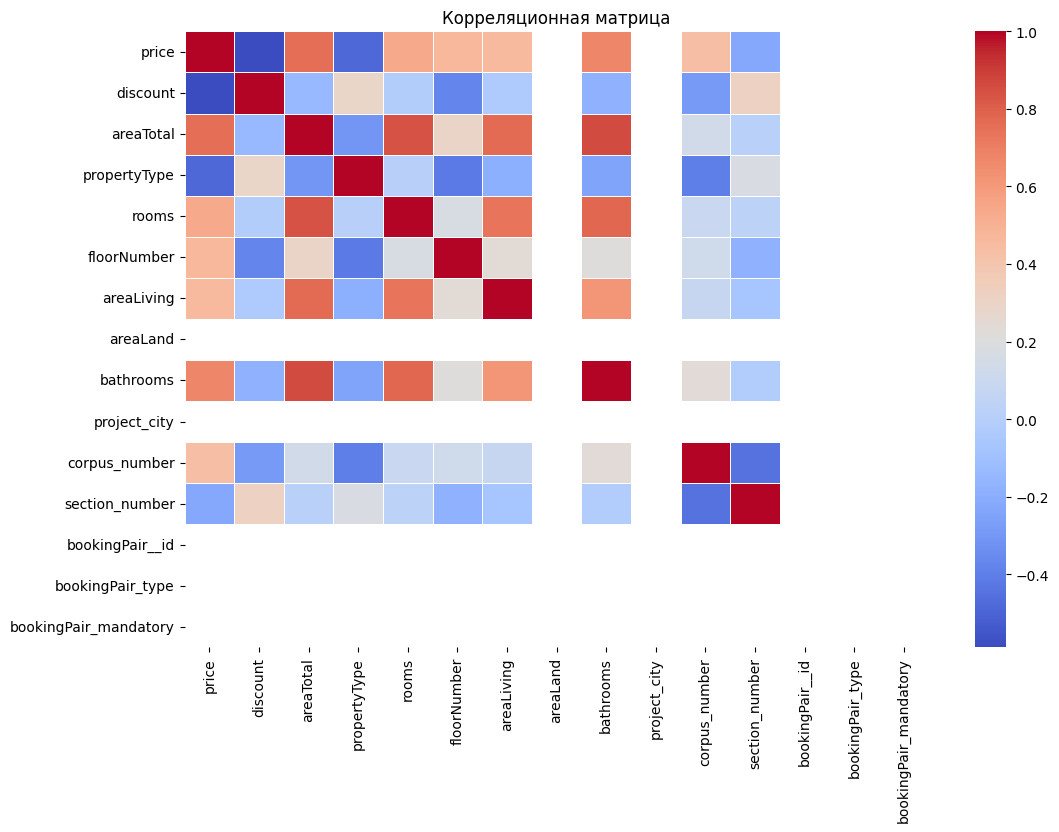

,price
price,1.000000
areaTotal,0.752968
bathrooms,0.675659
rooms,0.540130
floorNumber,0.467885
areaLiving,0.459546
corpus_number,0.436945
section_number,-0.225826
propertyType,-0.484155
discount,-0.588751


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Корреляционная матрица")
plt.show()

price_corr = corr_matrix["price"].sort_values(ascending=False)
price_corr


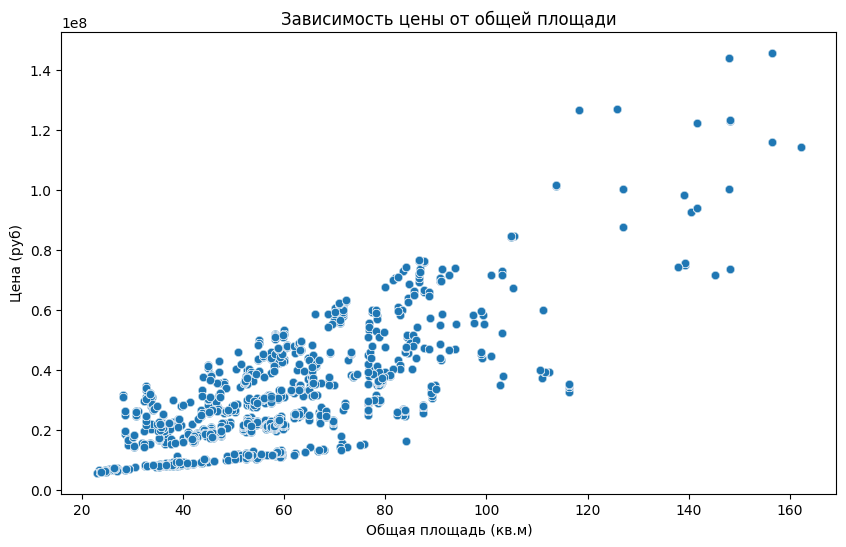

In [12]:
# Визуализация зависимости цены от площади
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="areaTotal", y="price", alpha=0.5)
plt.title("Зависимость цены от общей площади")
plt.xlabel("Общая площадь (кв.м)")
plt.ylabel("Цена (руб)")
plt.show()


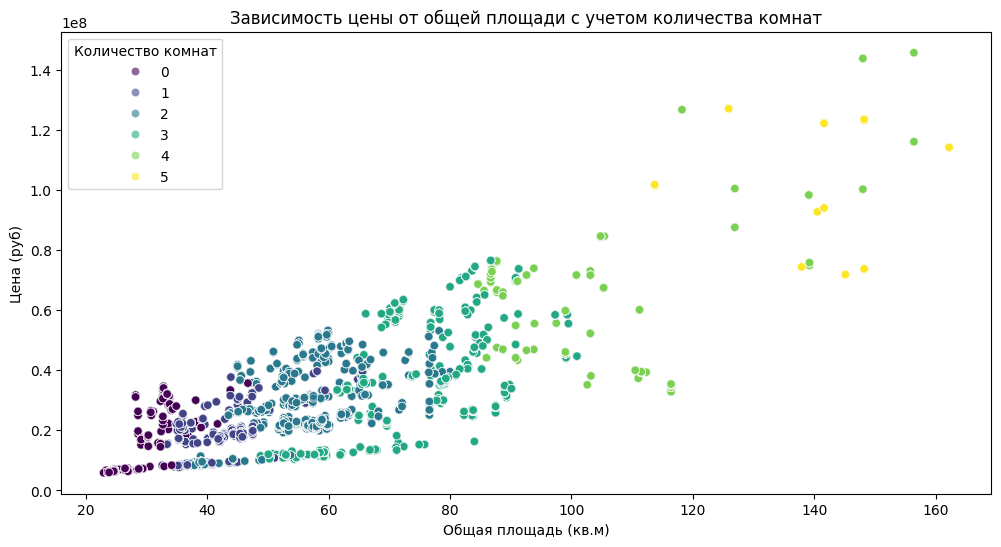

In [13]:
# Визуализация зависимости цены от общей площади с учетом количества комнат
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=df, x="areaTotal", y="price", hue="rooms", palette="viridis", alpha=0.6
)
plt.title("Зависимость цены от общей площади с учетом количества комнат")
plt.xlabel("Общая площадь (кв.м)")
plt.ylabel("Цена (руб)")
plt.legend(title="Количество комнат")
plt.show()


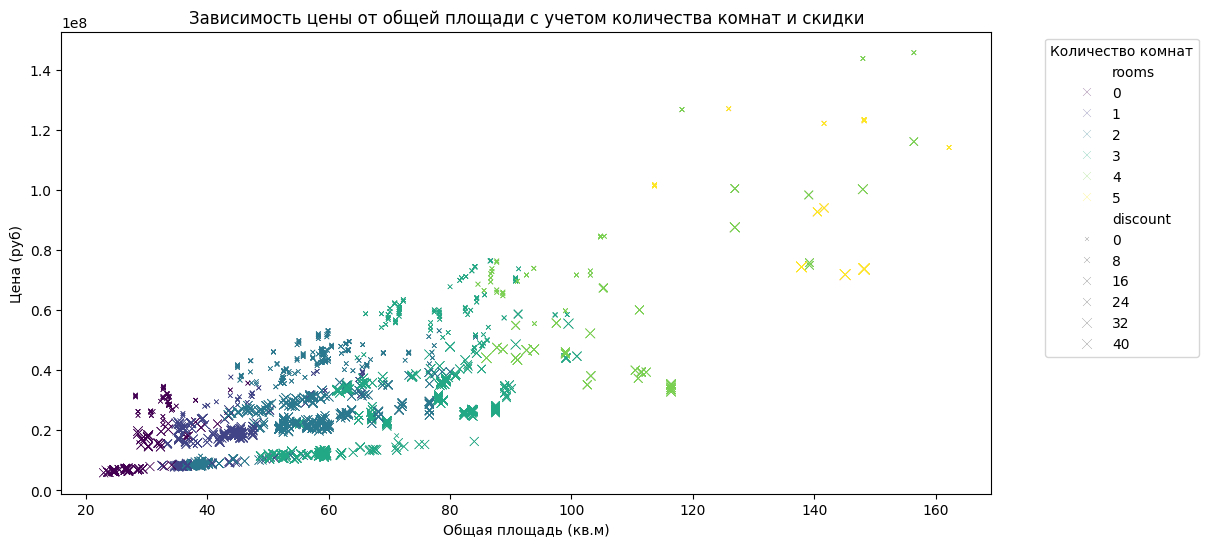

In [14]:
# Визуализация зависимости цены от общей площади с учетом количества комнат и размера скидки с крестиками
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=df,
    x="areaTotal",
    y="price",
    hue="rooms",
    size="discount",
    sizes=(10, 60),  # Размер маркеров варьируется в диапазоне
    palette="viridis",
    alpha=0.6,
    marker="x"  # Устанавливаем крестики вместо кругов
)
plt.title("Зависимость цены от общей площади с учетом количества комнат и скидки")
plt.xlabel("Общая площадь (кв.м)")
plt.ylabel("Цена (руб)")
plt.legend(title="Количество комнат", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


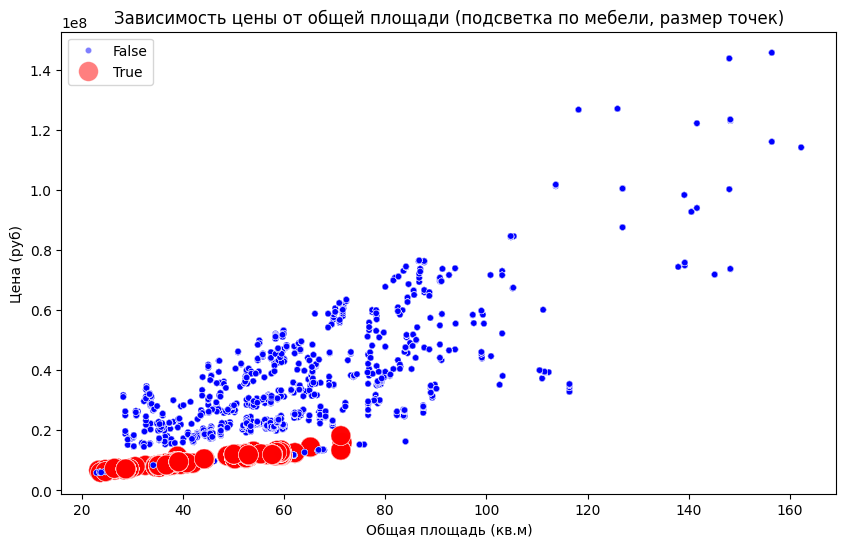

In [15]:
# Визуализация зависимости цены от площади с учетом мебели (увеличенные точки для меблированных квартир)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="areaTotal",
    y="price",
    hue="furniture",  # Подсветка по наличию мебели
    size="furniture",  # Размер точек зависит от наличия мебели
    sizes=(200, 20),  # Без мебели - маленькие точки, с мебелью - крупные
    palette={False: "blue", True: "red"},  # Цвета: без мебели - синий, с мебелью - красный
    alpha=0.5
)

plt.title("Зависимость цены от общей площади (подсветка по мебели, размер точек)")
plt.xlabel("Общая площадь (кв.м)")
plt.ylabel("Цена (руб)")
plt.legend()
plt.show()


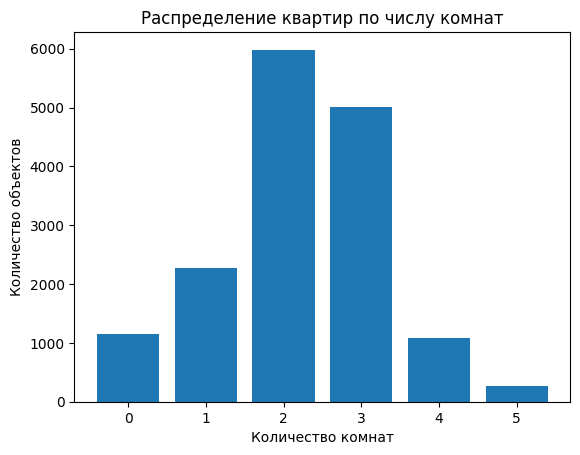

In [16]:
# Давайте посмотрим сколько однушек двушек и так далее представлено в новостройках ?
import pandas as pd
import matplotlib.pyplot as plt

room_counts = df['rooms'].value_counts().sort_index()

# Строим столбчатую диаграмму
plt.bar(room_counts.index, room_counts.values)
plt.xlabel('Количество комнат')
plt.ylabel('Количество объектов')
plt.title('Распределение квартир по числу комнат')
plt.show()

<ipython-input-17-a29ce15104ab>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x="rooms", y="price", palette="viridis")


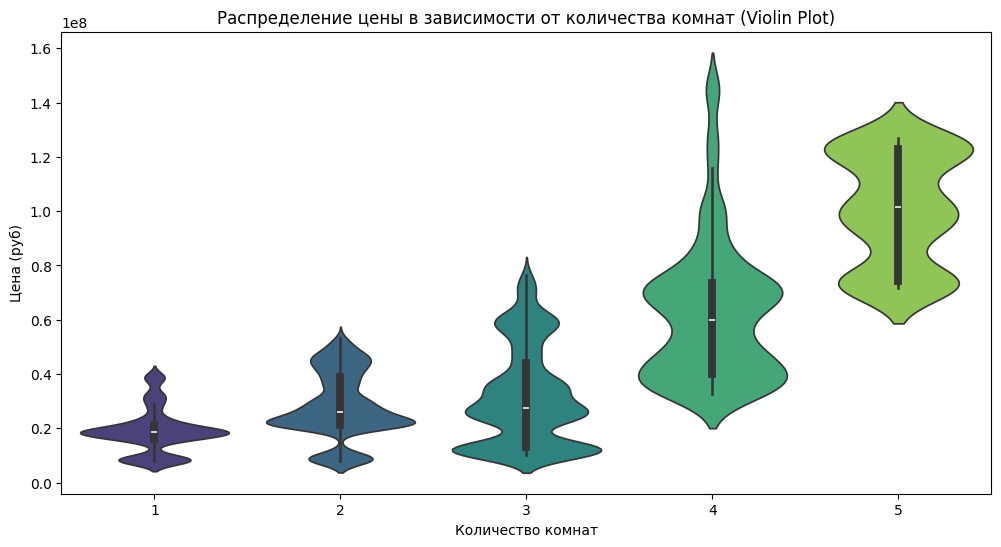

In [17]:
# Фильтруем явные выбросы и некорректные данные
df_filtered = df[(df["rooms"] > 0) & (df["price"] > 0) & (df["areaTotal"] > 0)]

# Построение violin plot для распределения цены в зависимости от количества комнат
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_filtered, x="rooms", y="price", palette="viridis")

plt.xlabel("Количество комнат")
plt.ylabel("Цена (руб)")
plt.title("Распределение цены в зависимости от количества комнат (Violin Plot)")
plt.show()


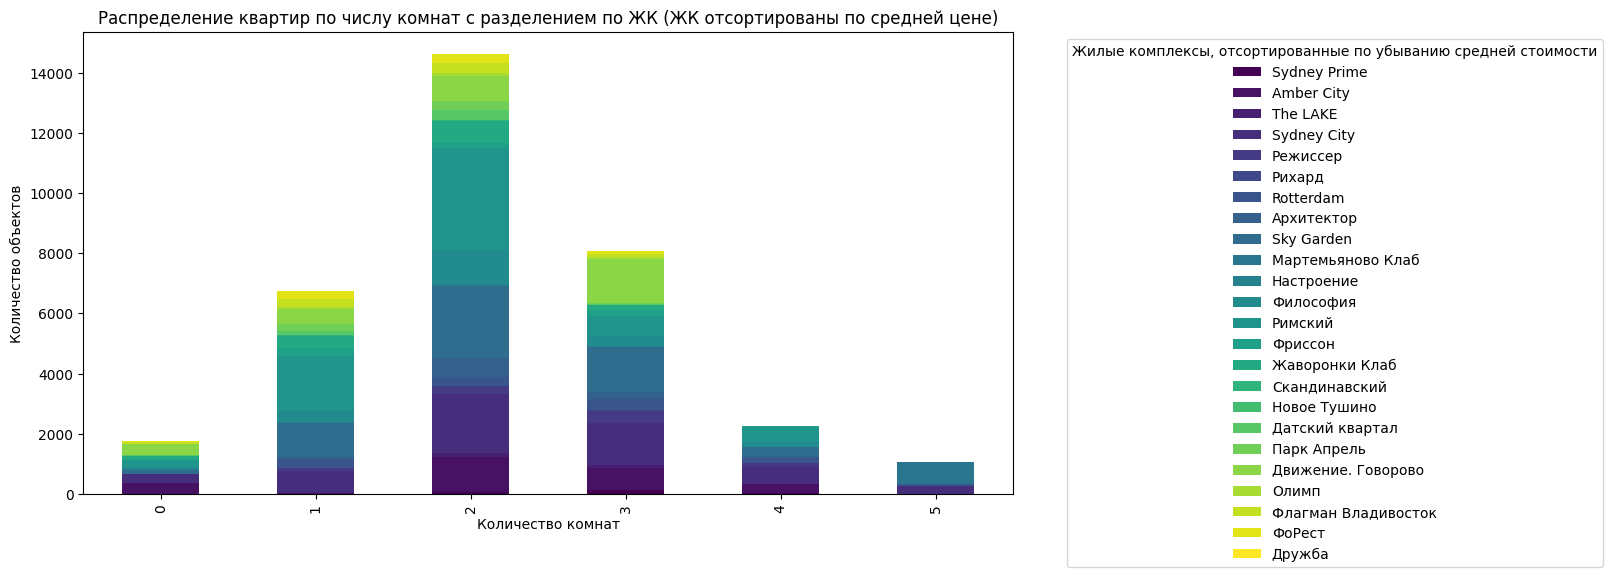

complex_title
Sydney Prime           1.074639e+08
Amber City             4.702399e+07
The LAKE               4.532894e+07
Sydney City            4.420045e+07
Режиссер               4.254725e+07
Рихард                 3.747102e+07
Rotterdam              3.600986e+07
Архитектор             3.389683e+07
Sky Garden             2.348269e+07
Мартемьяново Клаб      1.923215e+07
Настроение             1.755842e+07
Философия              1.652965e+07
Римский                1.387048e+07
Фриссон                1.382023e+07
Жаворонки Клаб         1.227150e+07
Скандинавский          1.181615e+07
Новое Тушино           1.156750e+07
Датский квартал        1.150751e+07
Парк Апрель            1.065924e+07
Движение. Говорово     1.006177e+07
Олимп                  8.836250e+06
Флагман Владивосток    8.757370e+06
ФоРест                 7.165625e+06
Дружба                 5.130694e+06
Name: price, dtype: float64


In [ ]:
# Рассчитываем среднюю стоимость квартир по каждому ЖК
avg_price_per_complex = df.groupby("complex_title")["price"].mean().sort_values(ascending=False)

# Пересортируем данные для графика
sorted_complexes = avg_price_per_complex.index
room_complex_counts_sorted = df.groupby(["rooms", "complex_title"]).size().unstack(fill_value=0)
room_complex_counts_sorted = room_complex_counts_sorted[sorted_complexes]  # Сортировка по средней цене

# Строим обновленную диаграмму
room_complex_counts_sorted.plot(
    kind="bar", stacked=True, figsize=(12, 6), colormap="viridis"
)
plt.xlabel("Количество комнат")
plt.ylabel("Количество объектов")
plt.title("Распределение квартир по числу комнат с разделением по ЖК (ЖК отсортированы по средней цене)")
plt.legend(title="Жилые комплексы, отсортированные по убыванию средней стоимости", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

print(avg_price_per_complex)



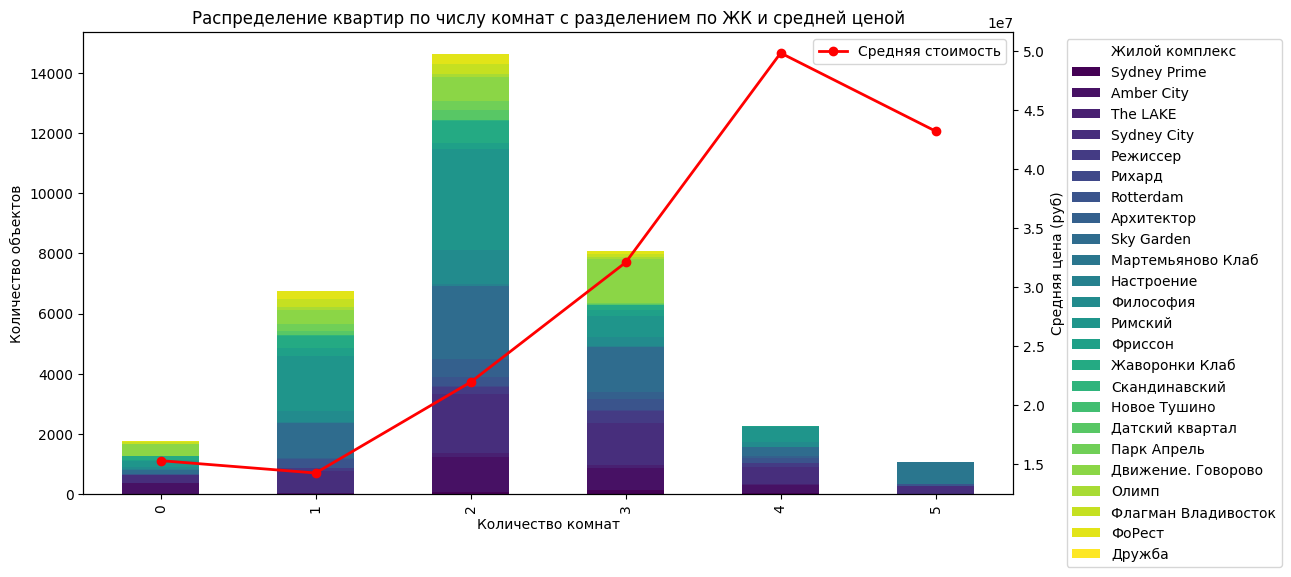

In [ ]:
# Рассчитываем среднюю стоимость квартир для каждого количества комнат
avg_price_per_room = df.groupby("rooms")["price"].mean()

# Построение графика с линией средней стоимости
fig, ax1 = plt.subplots(figsize=(12, 6))

# Столбчатая диаграмма с накоплением
room_complex_counts_sorted.plot(kind="bar", stacked=True, colormap="viridis", ax=ax1)
ax1.set_xlabel("Количество комнат")
ax1.set_ylabel("Количество объектов")
ax1.set_title("Распределение квартир по числу комнат с разделением по ЖК и средней ценой")
ax1.legend(title="Жилой комплекс", bbox_to_anchor=(1.05, 1), loc="upper left")

# Вторая ось Y для отображения средней стоимости
ax2 = ax1.twinx()
ax2.plot(avg_price_per_room.index, avg_price_per_room.values, color="red", marker="o", linestyle="-", linewidth=2, label="Средняя стоимость")
ax2.set_ylabel("Средняя цена (руб)")
ax2.legend(loc="upper right")

plt.show()


Уникальных project_slug: 24


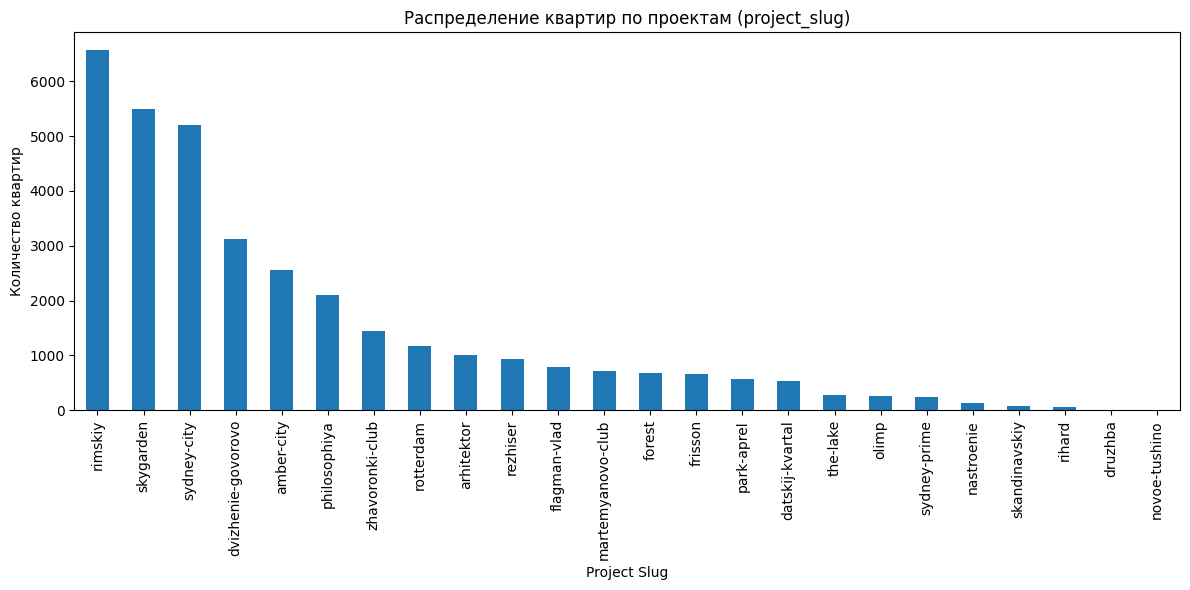

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


slug_counts = df_flats['project_slug'].value_counts()
print(f"Уникальных project_slug: {slug_counts.index.nunique()}")

# Строим столбчатую диаграмму
plt.figure(figsize=(12, 6))
slug_counts.plot(kind='bar')

plt.xlabel("Project Slug")
plt.ylabel("Количество квартир")
plt.title("Распределение квартир по проектам (project_slug)")
plt.tight_layout()
plt.show()


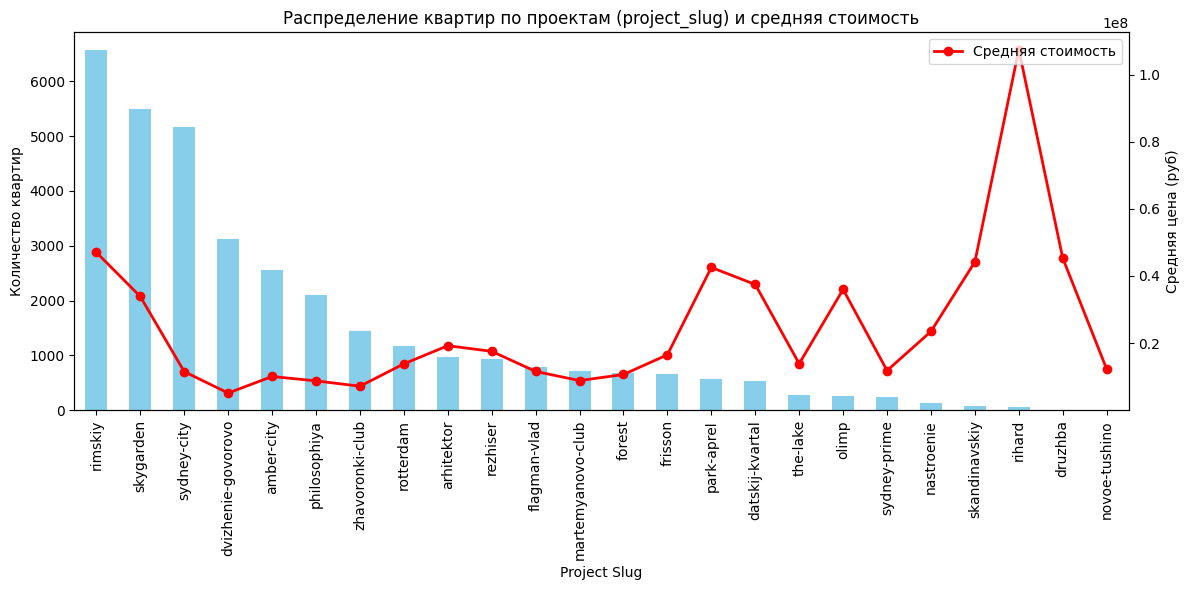

In [ ]:
# Подсчет количества квартир в каждом project_slug
slug_counts = df["project_slug"].value_counts()

avg_price_per_slug = df.groupby("project_slug")["price"].mean()
fig, ax1 = plt.subplots(figsize=(12, 6))

# Столбчатая диаграмма количества квартир по проектам
slug_counts.plot(kind="bar", ax=ax1, color="skyblue")
ax1.set_xlabel("Project Slug")
ax1.set_ylabel("Количество квартир")
ax1.set_title("Распределение квартир по проектам (project_slug) и средняя стоимость")
ax1.tick_params(axis="x", rotation=90)

# Вторая ось Y для отображения средней стоимости
ax2 = ax1.twinx()
ax2.plot(avg_price_per_slug.index, avg_price_per_slug.values, color="red", marker="o", linestyle="-", linewidth=2, label="Средняя стоимость")
ax2.set_ylabel("Средняя цена (руб)")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()


<ipython-input-19-7e4131afd81e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_furniture.index, y=avg_price_furniture.values, palette="viridis")


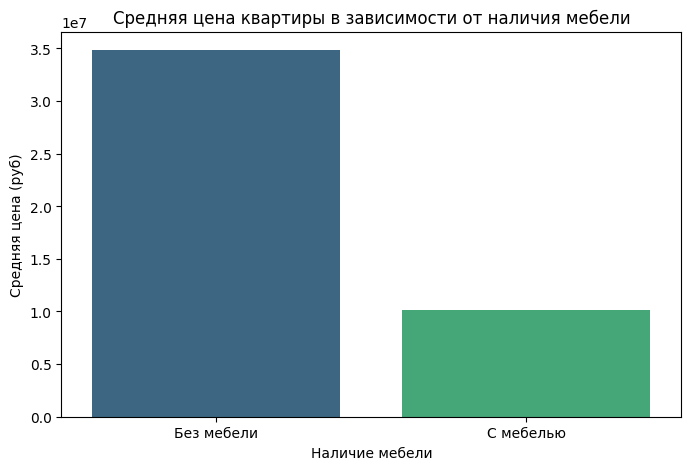

In [19]:
# Группировка данных по наличию мебели и вычисление средней цены
avg_price_furniture = df.groupby("furniture")["price"].mean()

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_furniture.index, y=avg_price_furniture.values, palette="viridis")

plt.xlabel("Наличие мебели")
plt.ylabel("Средняя цена (руб)")
plt.title("Средняя цена квартиры в зависимости от наличия мебели")
plt.xticks(ticks=[0, 1], labels=["Без мебели", "С мебелью"])

plt.show()
